# IMPORTIING LIBRARIES


In [ ]:
# importing libraries 
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

-> **reading the code**

In [ ]:
data = pd.read_csv('/content/Concrete_Data.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


-> **renaming column names**

In [ ]:
data= data.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'furnace_slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'super_plasticizer', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ': 'strength'})

data.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.shape

(1030, 9)

In [ ]:
data.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'strength'],
      dtype='object')

-> **checking null values- NO null vales in data**

In [ ]:
data.isnull().sum()

cement               0
furnace_slag         0
fly_ash              0
water                0
super_plasticizer    0
coarse_agg           0
fine_agg             0
age                  0
strength             0
dtype: int64

In [ ]:
data.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   furnace_slag       1030 non-null   float64
 2   fly_ash            1030 non-null   float64
 3   water              1030 non-null   float64
 4   super_plasticizer  1030 non-null   float64
 5   coarse_agg         1030 non-null   float64
 6   fine_agg           1030 non-null   float64
 7   age                1030 non-null   int64  
 8   strength           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# EDA- EXPLANATORY DATA ANALYSIS

**EDA**

In [ ]:
c=data.groupby(["age"])["strength"].median()

In [ ]:
c

age
1       9.455
3      15.720
7      21.650
14     26.540
28     33.760
56     51.720
90     39.680
91     67.950
100    46.985
120    39.380
180    40.905
270    51.730
360    41.685
365    42.815
Name: strength, dtype: float64

[Text(0, 0.5, 'Strength'),
 Text(0.5, 1.0, 'Strength Of Concrete Vs Age of Cement')]

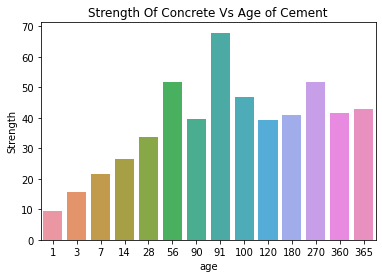

In [ ]:
sns.barplot(x=c.index,y=c.values).set(title="Strength Of Concrete Vs Age of Cement",ylabel="Strength")

1. **Relation between strength and cement ,water, age**

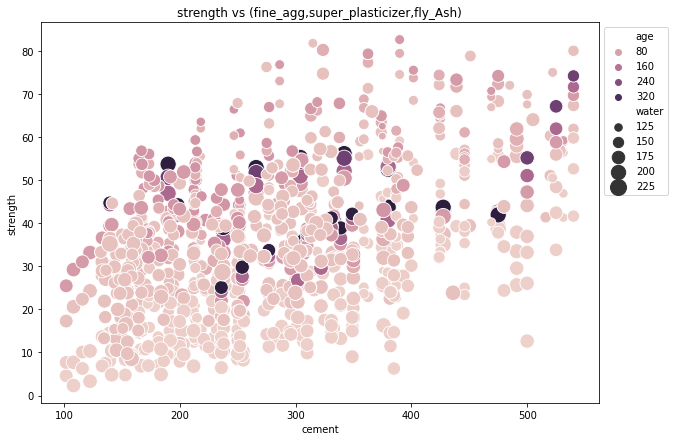

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="strength", x="cement", hue="age", size="water", data=data, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (fine_agg,super_plasticizer,fly_Ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

2. **Relation between strength and Fine agg,fly ash, super plasticizer**

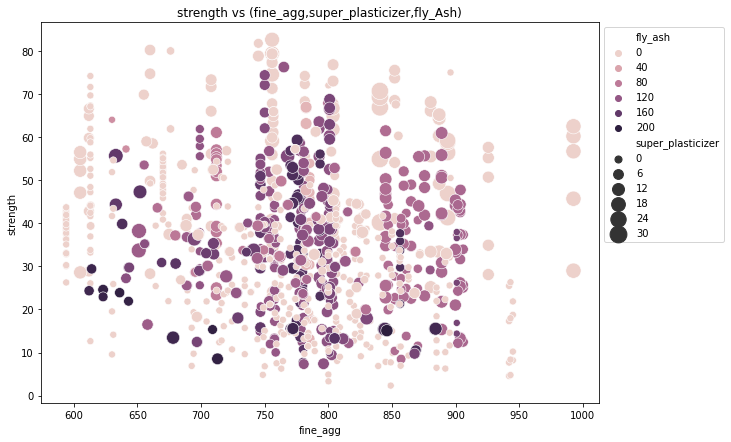

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="strength", x="fine_agg", hue="fly_ash", size="super_plasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (fine_agg,super_plasticizer,fly_Ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

3. **Relation between strength and cement**

Text(0.5, 0, 'cement')

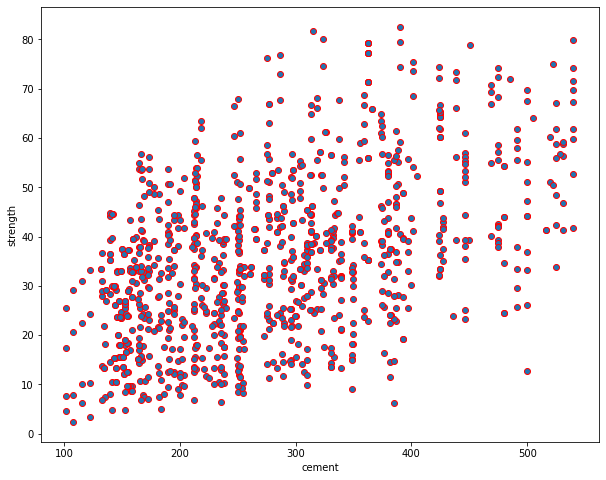

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(y='strength',x='cement',edgecolors='red',data=data)
plt.ylabel('strength')
plt.xlabel('cement')

4. **Relation between strength and furnance slag**

Text(0.5, 0, 'super_plasticizer')

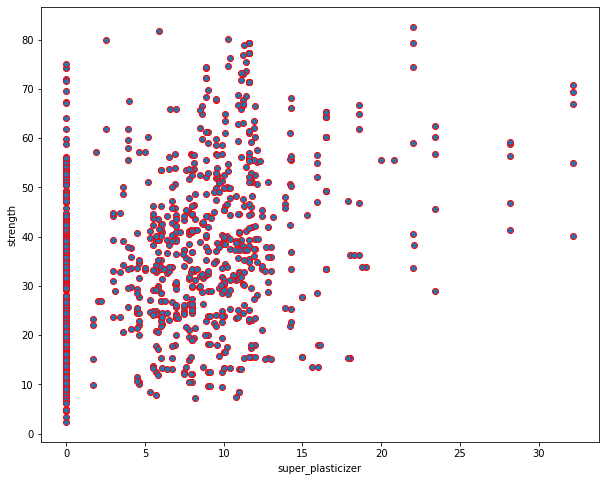

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(y='strength',x='super_plasticizer',edgecolors='red',data=data)
plt.ylabel('strength')
plt.xlabel('super_plasticizer')

5. **Relation between strength and fly ash**

Text(0.5, 0, 'fly_ash')

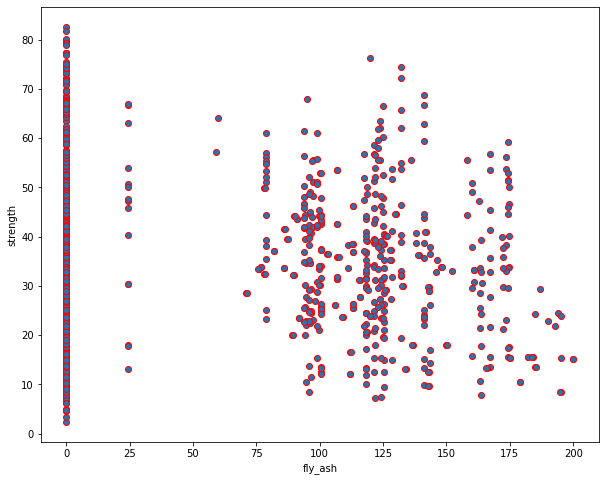

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(y='strength',x='fly_ash',edgecolors='red',data=data)
plt.ylabel('strength')
plt.xlabel('fly_ash')

6. **Relation between strength and water**

Text(0.5, 0, 'water')

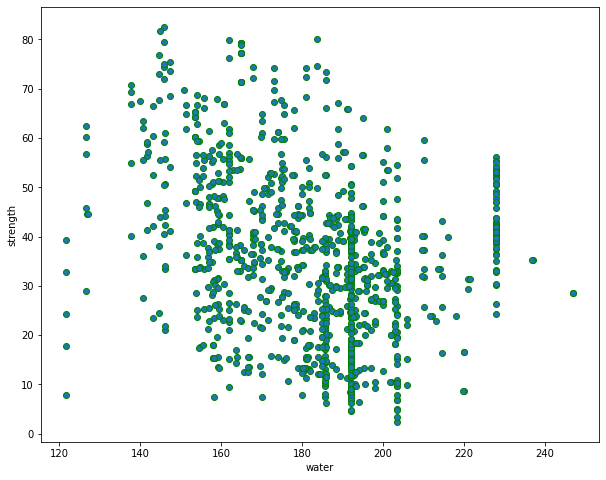

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(y='strength',x='water',edgecolors='green',data=data)
plt.ylabel('strength')
plt.xlabel('water')

7. *Visualizing the Correlation between the numerical variables using pairplot visualization**

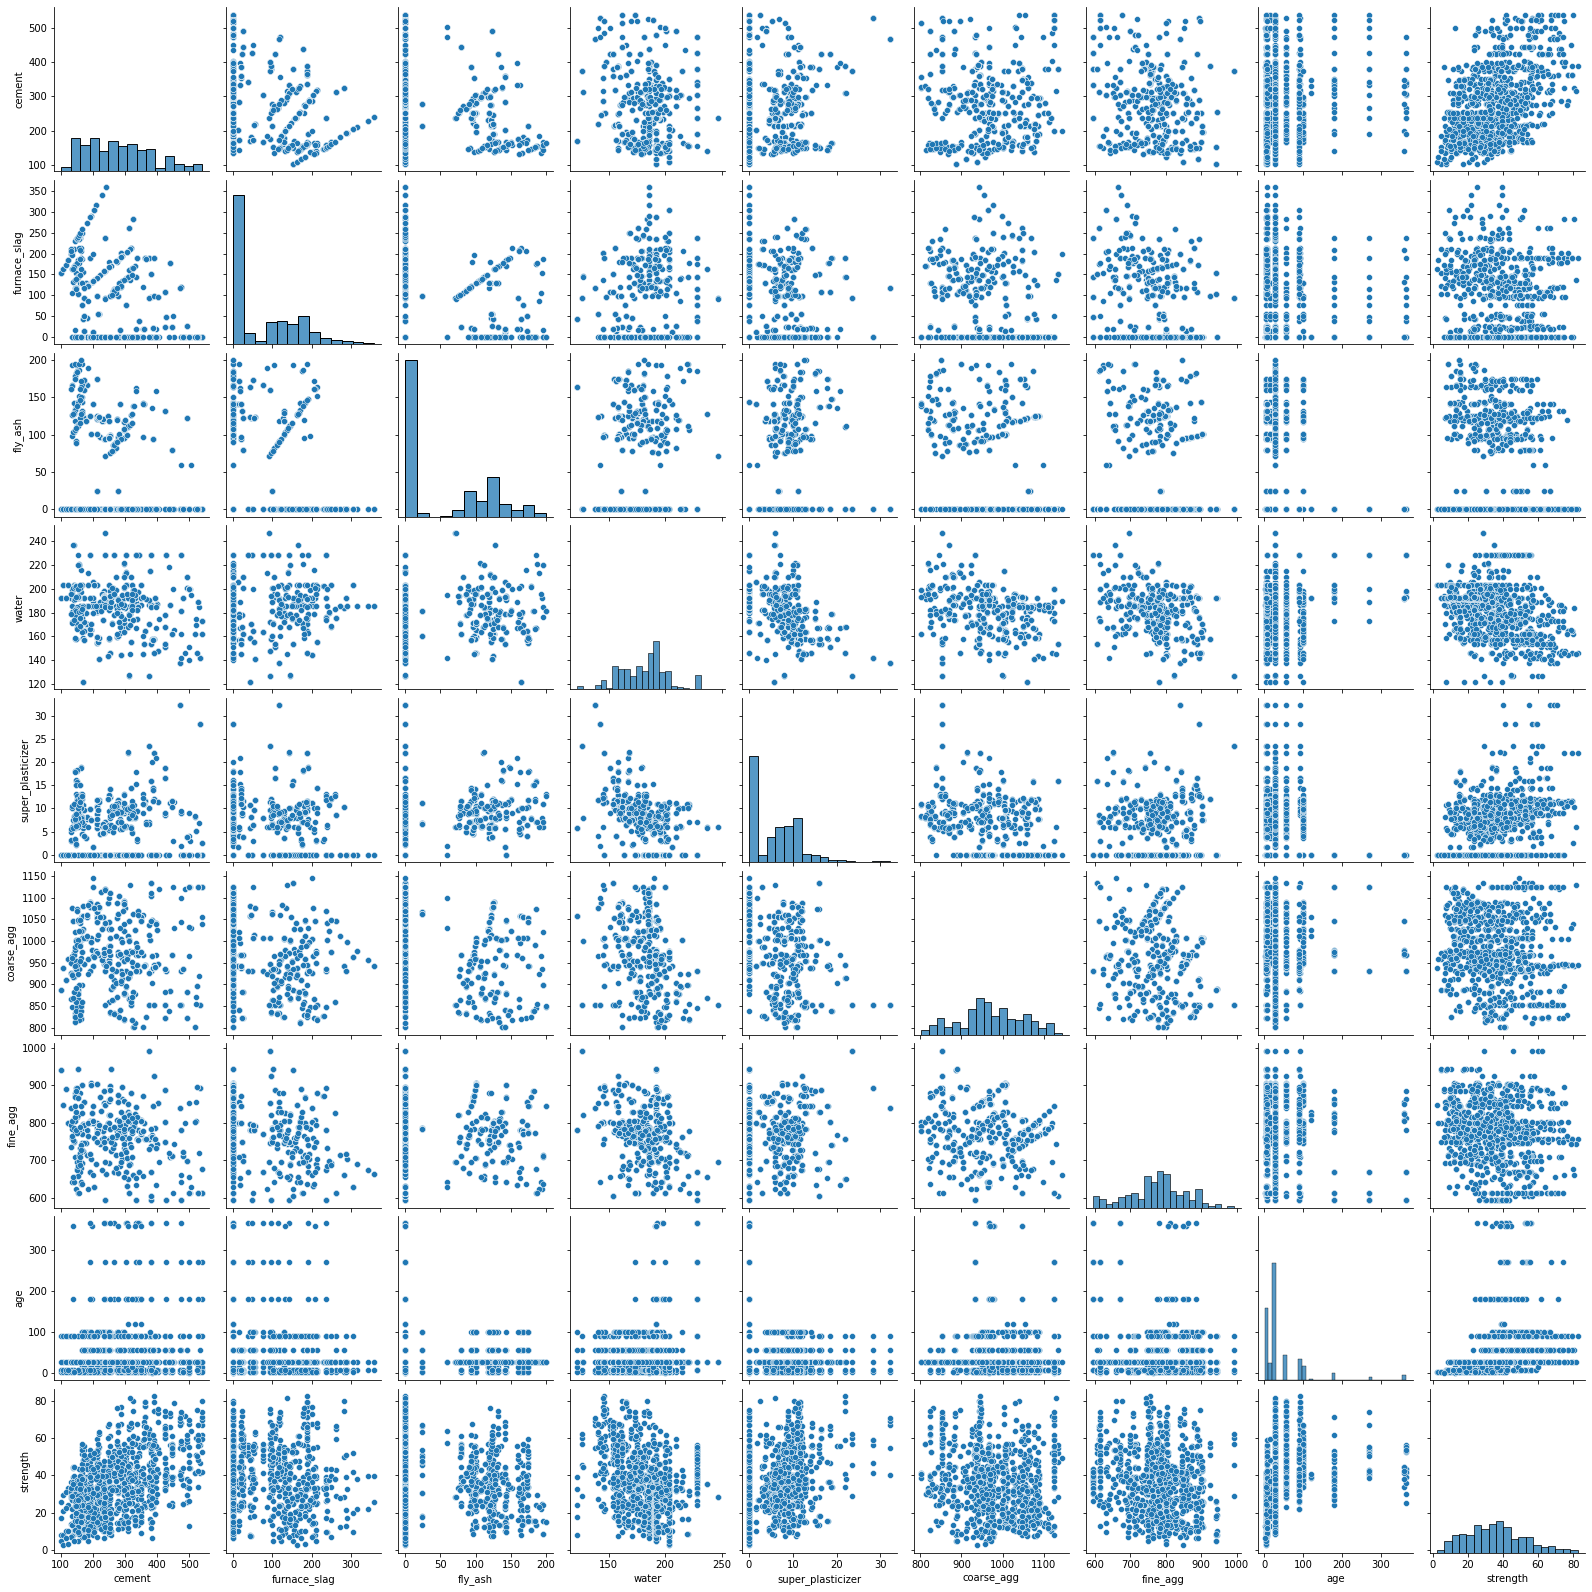

In [ ]:
sns.pairplot( data)

8. **heatmap for entire data**

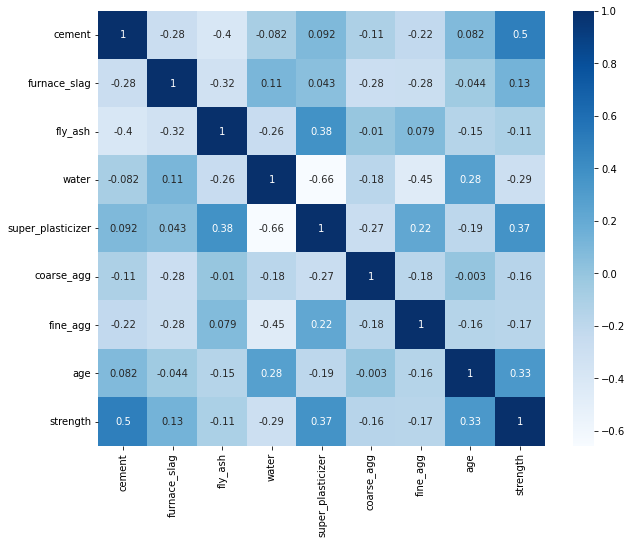

In [ ]:
#plot heatmap
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True ,cmap = 'Blues')

In [ ]:
c=data['age'].value_counts()

In [ ]:
print(c)

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64


9. **finding outliers in data**

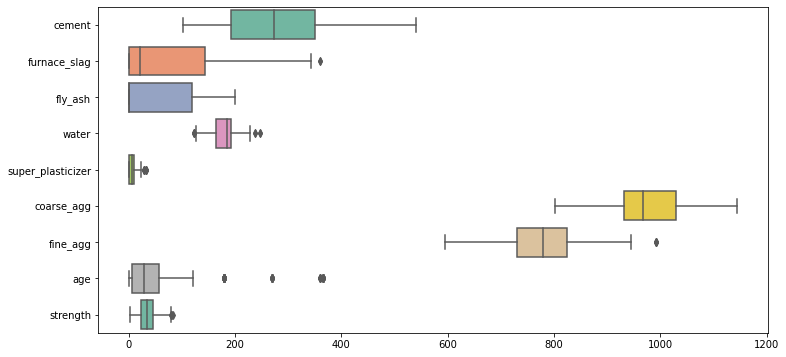

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, orient="h", palette="Set2", dodge=False)


10. **historgram between - strength vs  All elements**

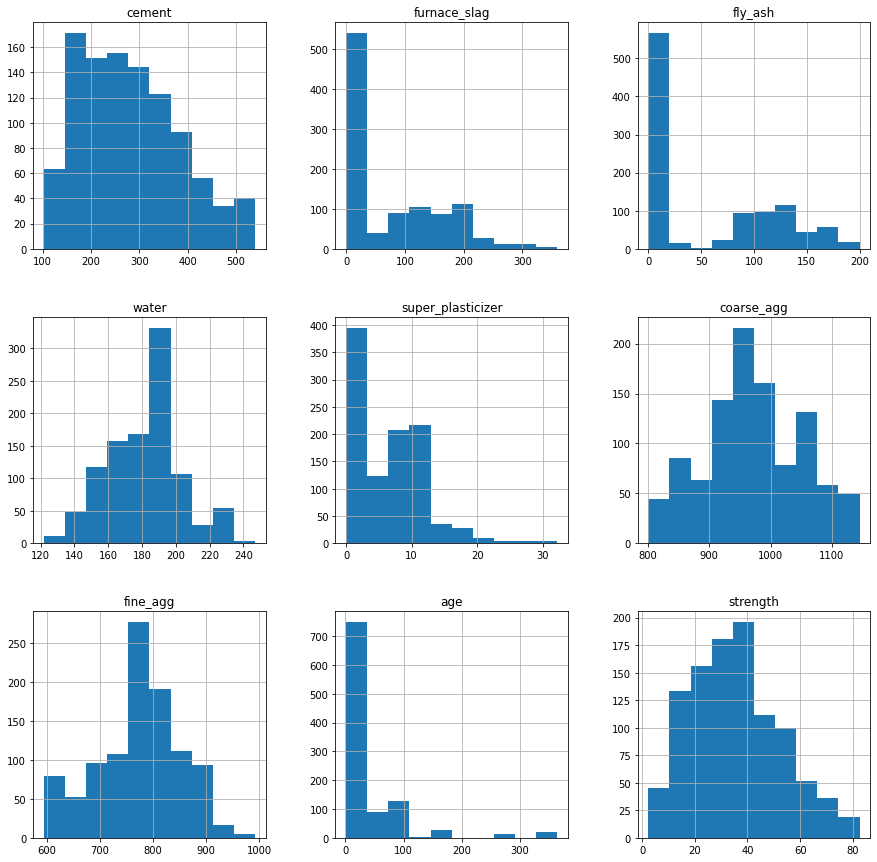

In [ ]:
data.hist(figsize=(15,15))
plt.show()

11. **Distribution of Each Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


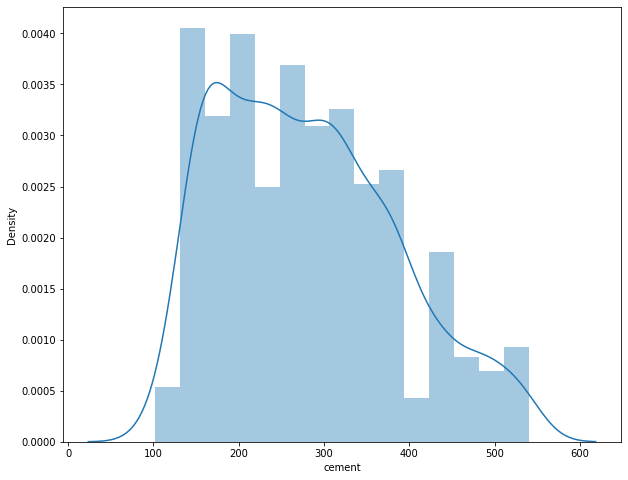

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


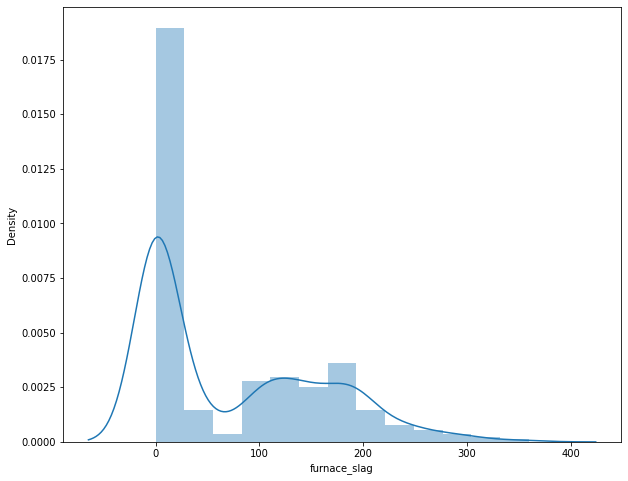

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


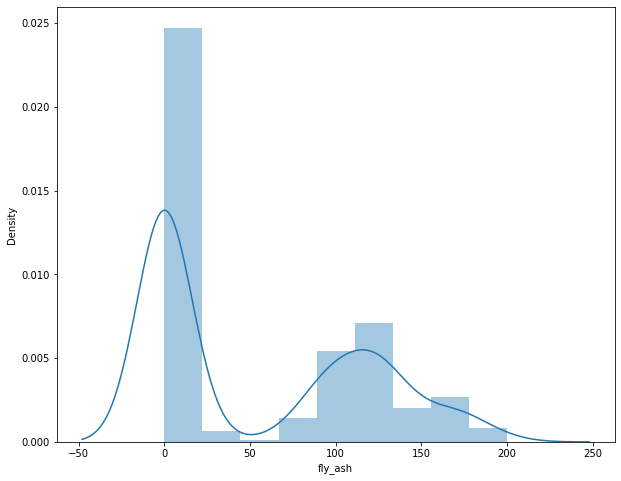

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


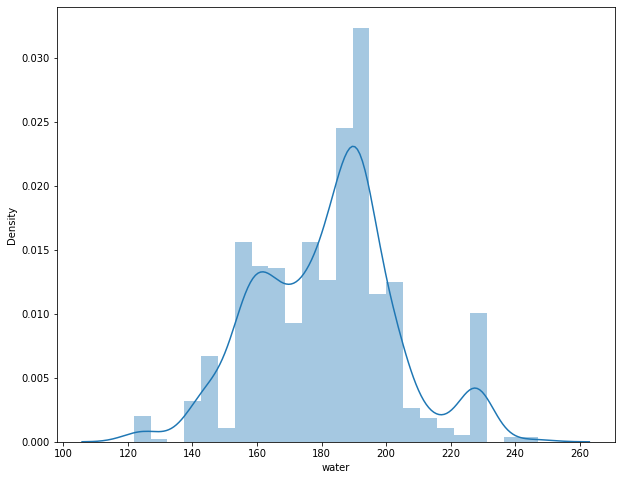

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


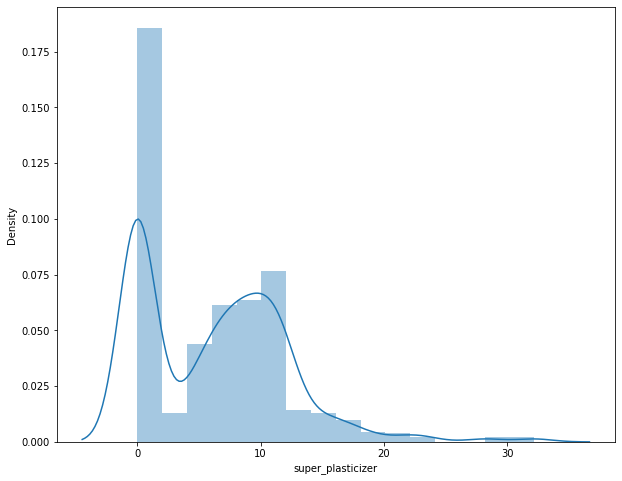

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


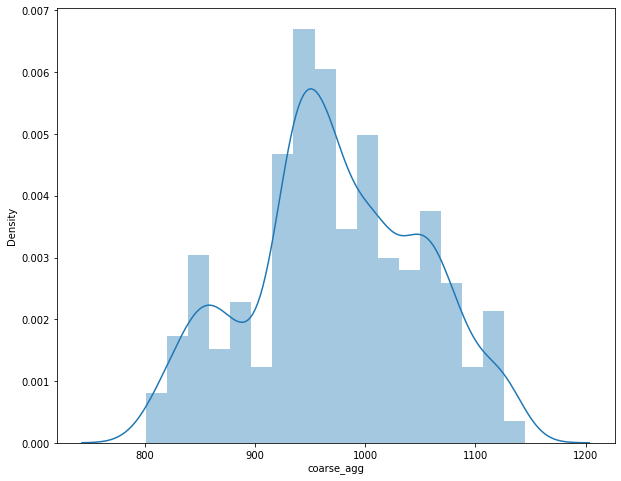

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


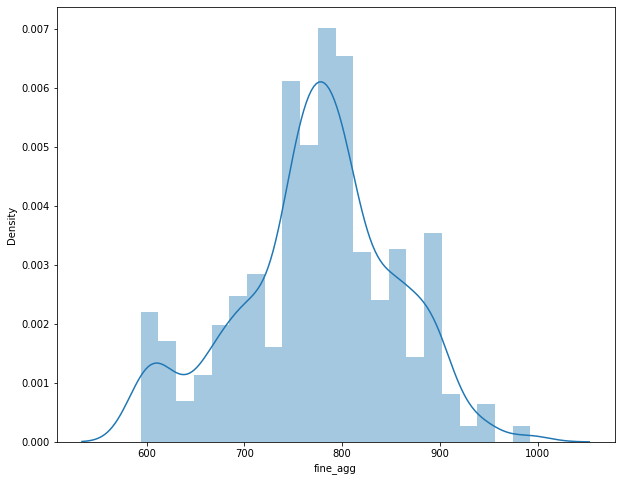

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


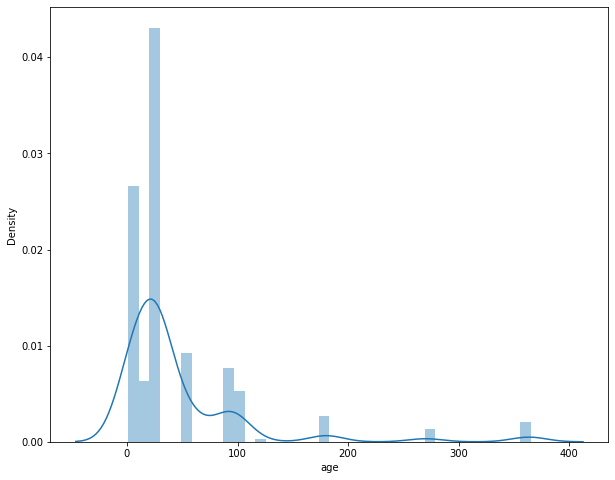

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


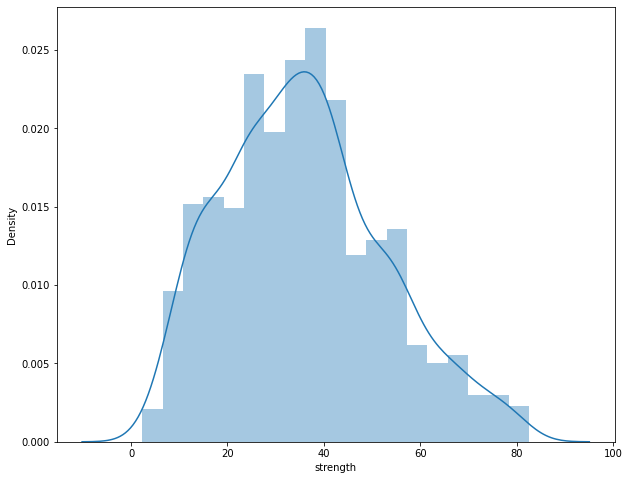

In [ ]:
for col in data.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(data[col])
    plt.show()


12. **Relationship Between Each Variable and Target Variable (Strength)  using joint plot**

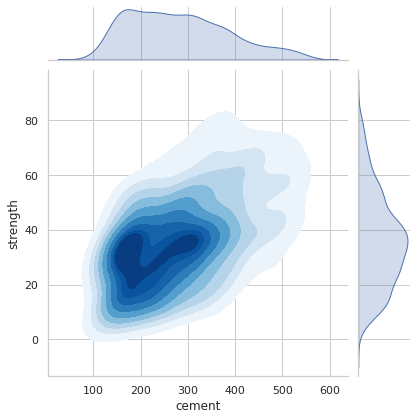

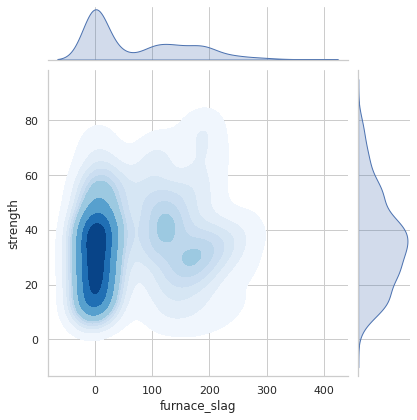

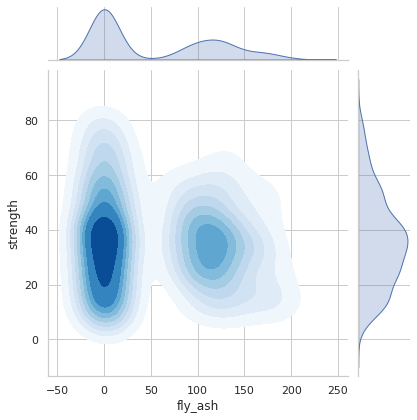

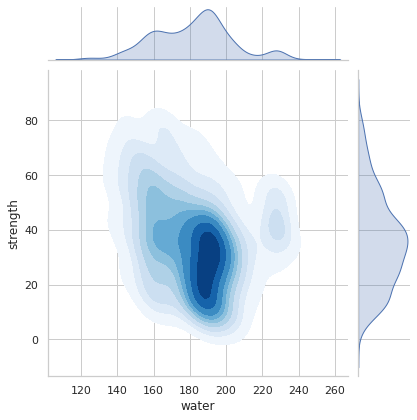

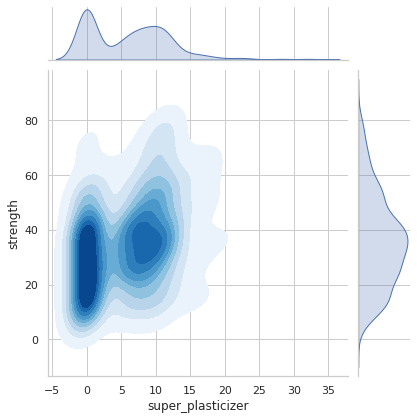

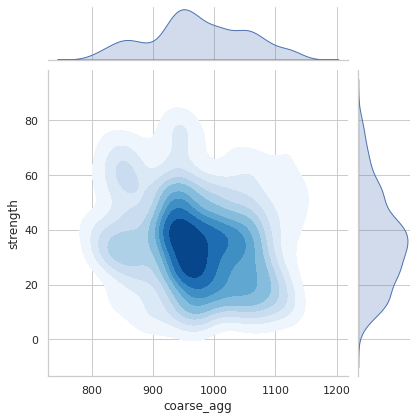

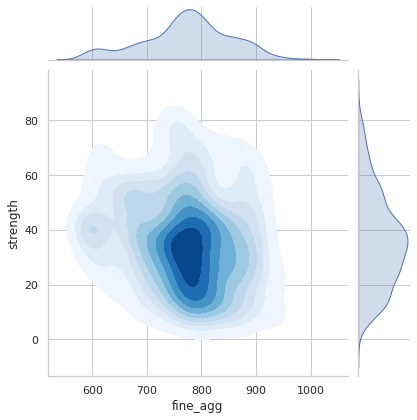

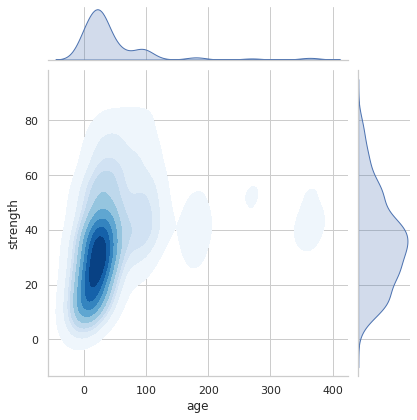

In [ ]:
sns.set(style="whitegrid")

cols_without_y = data.drop("strength", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=data[col], y=data["strength"], kind="kde", cmap="Blues", fill=True)
    plt.show()

13. Kernal Density plots to see the distribution of variables

In [ ]:
# Kernal Density plots to see the distribution of variables
sns.set(style="white") 
plt.figure(figsize = (20 , 20))
for variable in range(9):
    plt.subplot(4, 3, variable + 1)
    sns.kdeplot(df[list(X)[variable]], shade = True, color="green")
plt.show()

14

# Train Test


In [ ]:
# independent variables
x = data.drop(['strength'],axis=1)
# dependent variables
y = data['strength']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=23)
y_test

874    36.80
184    11.58
158    71.70
264    19.52
575    17.58
       ...  
76     40.20
822    25.18
813    37.33
118    60.29
207    34.20
Name: strength, Length: 206, dtype: float64

# FIITNG INTO LINEAR REG CODE

***FITTING INTO LINEAR REG - 1***

In this program, x contains the list of independent variables, and y contains the dependent variable in this case:

1. Independent variables are cement, flyash, water, superplasticizer, coaseseaggregate, fineaggregate, age.

2. dependent variable is the only strength

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)

7.580455598447255


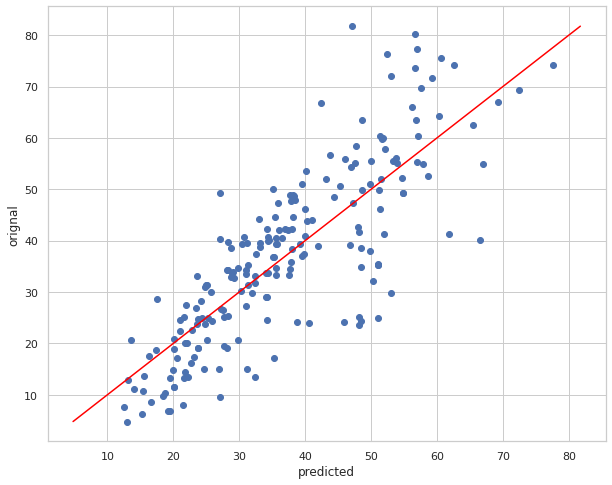

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

*** linear reg - 2***

In [ ]:
# independent variables
x1 = data.drop(['strength'],axis=1)
# dependent variables
y1 = data['strength']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.3, random_state=23)
y1_test

874    36.80
184    11.58
158    71.70
264    19.52
575    17.58
       ...  
66     44.70
436    33.69
251    29.22
966    12.46
94     42.80
Name: strength, Length: 309, dtype: float64

In [ ]:
lm=LinearRegression()
lm.fit(x1_train,y1_train)
y1_pred=lm.predict(x1_test)

In [ ]:
mae=metrics.mean_absolute_error(y1_test,y1_pred)
print(mae)

7.885999015839684


**linear reg - 3**

In [ ]:
# independent variables
x2 = data.drop(['strength'],axis=1)
# dependent variables
y2 = data['strength']

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size=0.25, random_state=23)
y2_test

874    36.80
184    11.58
158    71.70
264    19.52
575    17.58
       ...  
662    33.66
651     4.90
59     33.02
215    22.72
26     41.15
Name: strength, Length: 258, dtype: float64

In [ ]:
lm=LinearRegression()
lm.fit(x2_train,y2_train)
y2_pred=lm.predict(x2_test)

In [ ]:
mae=metrics.mean_absolute_error(y2_test,y2_pred)
print(mae)

7.888206844393019


# NEURAL NETWORK

***--NEURAL NETWORK--***

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x= data.drop("strength", axis=1)
y=data["strength"]
x.head

<bound method NDFrame.head of       cement  furnace_slag  fly_ash  water  super_plasticizer  coarse_agg  \
0      540.0           0.0      0.0  162.0                2.5      1040.0   
1      540.0           0.0      0.0  162.0                2.5      1055.0   
2      332.5         142.5      0.0  228.0                0.0       932.0   
3      332.5         142.5      0.0  228.0                0.0       932.0   
4      198.6         132.4      0.0  192.0                0.0       978.4   
...      ...           ...      ...    ...                ...         ...   
1025   276.4         116.0     90.3  179.6                8.9       870.1   
1026   322.2           0.0    115.6  196.0               10.4       817.9   
1027   148.5         139.4    108.6  192.7                6.1       892.4   
1028   159.1         186.7      0.0  175.6               11.3       989.6   
1029   260.9         100.5     78.3  200.6                8.6       864.5   

      fine_agg  age  
0        676.0   28  
1

# NN RATIO - 80-20  8--6--1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 20, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 9.6756 - mae: 9.6756


[9.675556182861328, 9.675556182861328]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 50, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.1606 - mae: 8.1606


[8.160630226135254, 8.160630226135254]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test, y_test) 

7/7 [==============================] - 0s 1ms/step - loss: 8.0486 - mae: 8.0486


[8.04855728149414, 8.04855728149414]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.8383 - mae: 7.8383


[7.838316917419434, 7.838316917419434]

Text(0.5, 0, 'ephocs')

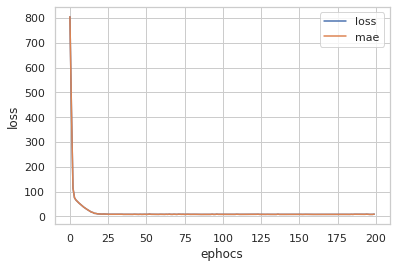

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("ephocs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.9998 - mae: 8.9998


[8.999811172485352, 8.999811172485352]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 400, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.5364 - mae: 8.5364


[8.536391258239746, 8.536391258239746]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.8636 - mae: 7.8636


[7.863617420196533, 7.863617420196533]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 1000, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.0615 - mae: 8.0615


[8.061458587646484, 8.061458587646484]

# NN  RATIO - 80-20  8--5--3--1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 20, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.5318 - mae: 8.5318


[8.531759262084961, 8.531759262084961]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 50, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.8847 - mae: 7.8847


[7.884699821472168, 7.884699821472168]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.9770 - mae: 7.9770


[7.977001667022705, 7.977001667022705]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.1627 - mae: 8.1627


[8.16274356842041, 8.16274356842041]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 300, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 8.2966 - mae: 8.2966


[8.296562194824219, 8.296562194824219]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 400, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)


7/7 [==============================] - 0s 2ms/step - loss: 7.9638 - mae: 7.9638


[7.963840484619141, 7.963840484619141]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 8.3018 - mae: 8.3018


[8.301756858825684, 8.301756858825684]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(3),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.0685 - mae: 8.0685


[8.068540573120117, 8.068540573120117]

# NN ratio 80-20    8--5--4--2--1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=20, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.0499 - mae: 8.0499


[8.049949645996094, 8.049949645996094]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=50, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.7613 - mae: 7.7613


[7.7613444328308105, 7.7613444328308105]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.8390 - mae: 7.8390


[7.838984489440918, 7.838984489440918]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=200, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 8.1896 - mae: 8.1896


[8.18959903717041, 8.18959903717041]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=300, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.9488 - mae: 7.9488


[7.948762893676758, 7.948762893676758]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=400, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.9324 - mae: 7.9324


[7.932363033294678, 7.932363033294678]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=500, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.9433 - mae: 7.9433


[7.943256378173828, 7.943256378173828]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model= tf.keras.Sequential([ tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),  
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),                           
                            tf.keras.layers.Dense(1)])
# STEP2: Compiling the model  
# optimizer Adam
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 8.0117 - mae: 8.0117


[8.011707305908203, 8.011707305908203]

# BAGGING

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=750, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(x_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3354448028


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=650, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x1_train, y1_train)

In [ ]:
mae = metrics.mean_absolute_error(y1_test, l.predict(x1_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3518054832


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=600, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=23
)

In [ ]:
l=bag_model.fit(x2_train, y2_train)

In [ ]:
mae = metrics.mean_absolute_error(y2_test, l.predict(x2_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3855882173


# BOOSTING

## GradientBoosting


In [ ]:
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=750,
    learning_rate=0.15,
    random_state=23 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

2.9265978733238587

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=750,
    learning_rate=0.15,
    random_state=23 )
regressor.fit(x1_train, y1_train)
y1_pred = regressor.predict(x1_test)
mean_absolute_error(y1_test, y1_pred)

3.044281904572922

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=750,
    learning_rate=0.15,
    random_state=23 )
regressor.fit(x2_train, y2_train)
y2_pred = regressor.predict(x2_test)
mean_absolute_error(y2_test, y2_pred)

2.813421612845937

## EXTREME GRADIENT BOOSTING

In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=750,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
eg=mean_absolute_error(y_test, y_pred)
print("mean absolute error",eg)

[07:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.8415557635872104


In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=750,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x1_train, y1_train)
y1_pred = clf.predict(x1_test)
eg=mean_absolute_error(y1_test, y1_pred)
print("mean absolute error",eg)

[07:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.9852027175804556


In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=750,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x2_train, y2_train)
y2_pred = clf.predict(x2_test)
eg=mean_absolute_error(y2_test, y2_pred)
print("mean absolute error",eg)

[07:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.8971660275422324


## ADA BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=750,
                           learning_rate=0.15,
                           random_state=23)
    
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
ab=mean_absolute_error(y_test, y_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 6.451709151932458


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=750,
                           learning_rate=0.15,
                           random_state=23)
    
adaclf.fit(x1_train, y1_train)
y1_pred_1 = adaclf.predict(x1_test)
ab=mean_absolute_error(y1_test, y1_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 5.942325097779612


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=750,
                           learning_rate=0.15,
                           random_state=23)
    
adaclf.fit(x2_train, y2_train)
y2_pred_1 = adaclf.predict(x2_test)
ab=mean_absolute_error(y2_test, y2_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 6.007914777958654


1.  LINEAR REG 7.580455598447255
2. NN - 8-6-1--200E   7.8383
3. BAGGING - 4.2545
4. EXTREME GRADIENT BOOSTING  - 2.813421612845937